## Evoked activity analysis (Days 0-14) (Figure 5C, SuppFigure 5)

Then saving peak information as .csv files to open in R for statistical analysis

In [1]:
import scipy
import os
import numpy as np
import pandas as pd
import skimage as sk
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
# set plot defaults
import matplotlib as mpl
import math

Read in files as a dictionary that contains the session as keys and arrays of fluorescence as values

In [17]:
dir_data = r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day0-14_analysis\Evoked_activity_analysis\average_PSTH'
save_dir = r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day0-14_analysis\Evoked_activity_analysis\output'
dir_files = os.listdir(dir_data)

Importing everything as two massive dictionaries: one for sucrose, and one for airpuff

In [18]:
list_conditions = ['saline_Day0','morphine_Day0','saline_Day2','morphine_Day2','saline_Day4','morphine_Day4','saline_Day6','morphine_Day6','saline_Day14', 'morphine_Day14']

In [19]:
os.chdir(dir_data)

puff = pd.DataFrame()
suc = pd.DataFrame()

array_dict_suc = dict()
array_dict_puff = dict()

for string in list_conditions:
    for file in dir_files:
        if string in file:
            if 'puff' in file:
                temp1 = pd.read_excel(file).drop('Unnamed: 0', axis=1)#.iloc[:,0:57]
                puff = pd.concat([puff, temp1])
            elif 'suc' in file:
                temp2 = pd.read_excel(file).drop('Unnamed: 0', axis=1)#.iloc[:,0:57]
                suc = pd.concat([suc, temp2])
    array_dict_suc[string] = suc
    array_dict_puff[string] = puff
    puff = pd.DataFrame()
    suc = pd.DataFrame()  

Zscoring the traces within each session

In [20]:
from scipy import stats

In [21]:
Zscore_df = pd.DataFrame()
puff_zscore = dict()

for key in array_dict_puff:
    zscored = stats.zscore(array_dict_puff[key].iloc[:,0:75], axis=1)
    Zscore_df = pd.concat([Zscore_df, zscored])
    puff_zscore[key] = Zscore_df
    Zscore_df = pd.DataFrame()
    
Zscore_df = pd.DataFrame()
suc_zscore = dict()

for key in array_dict_suc:
    zscored = stats.zscore(array_dict_suc[key].iloc[:,0:75], axis=1)
    Zscore_df = pd.concat([Zscore_df, zscored])
    suc_zscore[key] = Zscore_df
    Zscore_df = pd.DataFrame()

Or dF/F

In [22]:
dF_df = pd.DataFrame()
puff_dF = dict()

for key in array_dict_puff:
    for index, row in array_dict_puff[key].iterrows():
        df_list = list()
        for frame in row:
            #dF/F calculation using the timestamps prior to airpuff/suc delivery
            df = (frame - np.nanmean(row[0:19]))/np.nanmean(row[0:19])
            df_list.append(df)
        dF_df = pd.concat([dF_df, pd.DataFrame(df_list[0:75])], axis=1)
        df_list = list()
    puff_dF[key] = dF_df.transpose()
    dF_df = pd.DataFrame()
    
dF_df = pd.DataFrame()
suc_dF = dict()

for key in array_dict_puff:
    for index, row in array_dict_suc[key].iterrows():
        df_list = list()
        for frame in row:
            #dF/F calculation using the timestamps prior to airpuff/suc delivery
            df = (frame - np.mean(row[0:19]))/np.mean(row[0:19])
            df_list.append(df)
        dF_df = pd.concat([dF_df, pd.DataFrame(df_list[0:75])], axis=1)
        df_list = list()
    suc_dF[key] = dF_df.transpose()
    dF_df = pd.DataFrame()

### Plotting traces

Airpuff trials

In [ ]:
os.getcwd()

In [ ]:
os.chdir(r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day0-14_analysis\Evoked_activity_analysis\output')

In [ ]:
time = np.arange(0, 57)

In [ ]:
sal = puff_dF['saline_Day0'].iloc[:,0:57].mean(axis=0)
sal_sem = puff_dF['saline_Day0'].iloc[:,0:57].sem(axis=0)
mor = puff_dF['morphine_Day0'].iloc[:,0:57].mean(axis=0)
mor_sem = puff_dF['morphine_Day0'].iloc[:,0:57].sem(axis=0)

In [ ]:
len(time)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Airpuff responses Day0")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-.05, 0.4)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day0_airpuff_mean_dF.pdf', format='pdF', dpi=300)
fig.savefig('Day0_airpuff_mean_dF.png', format='png', dpi=300)

In [ ]:
sal = puff_dF['saline_Day2'].iloc[:,0:57].mean(axis=0)
sal_sem = puff_dF['saline_Day2'].iloc[:,0:57].sem(axis=0)
mor = puff_dF['morphine_Day2'].iloc[:,0:57].mean(axis=0)
mor_sem = puff_dF['morphine_Day2'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Airpuff responses Day2")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-.05, 0.4)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day2_Airpuff_mean_dF.pdF', format='pdF', dpi=300)
fig.savefig('Day2_Airpuff_mean_dF.png', format='png', dpi=300)

In [ ]:
sal = puff_dF['saline_Day4'].iloc[:,0:57].mean(axis=0)
sal_sem = puff_dF['saline_Day4'].iloc[:,0:57].sem(axis=0)
mor = puff_dF['morphine_Day4'].iloc[:,0:57].mean(axis=0)
mor_sem = puff_dF['morphine_Day4'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Airpuff responses Day4")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-.05, 0.4)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day4_Airpuff_mean_dF.pdF', format='pdF', dpi=300)
fig.savefig('Day4_Airpuff_mean_dF.png', format='png', dpi=300)

In [ ]:
sal = puff_dF['saline_Day6'].iloc[:,0:57].mean(axis=0)
sal_sem = puff_dF['saline_Day6'].iloc[:,0:57].sem(axis=0)
mor = puff_dF['morphine_Day6'].iloc[:,0:57].mean(axis=0)
mor_sem = puff_dF['morphine_Day6'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Airpuff responses Day6")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-.05, 0.4)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day6_Airpuff_mean_dF.pdF', format='pdF', dpi=300)
fig.savefig('Day6_Airpuff_mean_dF.png', format='png', dpi=300)

In [ ]:
#Excluding LS3 and LS4 from Day14
sal = puff_dF['saline_Day14'].iloc[:,0:57].mean(axis=0)
sal_sem = puff_dF['saline_Day14'].iloc[:,0:57].sem(axis=0)
mor = puff_dF['morphine_Day14'].iloc[:,0:57].mean(axis=0)
mor_sem = puff_dF['morphine_Day14'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Airpuff responses Day14")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-.05, 0.4)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day14_Airpuff_mean_dF.pdF', format='pdF', dpi=300)
fig.savefig('Day14_Airpuff_mean_dF.png', format='png', dpi=300)

Sucrose trials

In [ ]:
time = np.arange(0, 57)

In [ ]:
sal = suc_zscore['saline_Day0'].iloc[:,0:57].mean(axis=0)
sal_sem = suc_zscore['saline_Day0'].iloc[:,0:57].sem(axis=0)
mor = suc_zscore['morphine_Day0'].iloc[:,0:57].mean(axis=0)
mor_sem = suc_zscore['morphine_Day0'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Sucrose responses Day0")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-1.5,1.5)
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='Z scored activity')
os.chdir(save_dir)
fig.savefig('Day0_sucrose_mean_zscore.pdf', format='pdf', dpi=300)
fig.savefig('Day0_sucrose_mean_zscore.png', format='png', dpi=300)

In [ ]:
sal = suc_zscore['saline_Day2'].iloc[:,0:57].mean(axis=0)
sal_sem = suc_zscore['saline_Day2'].iloc[:,0:57].sem(axis=0)
mor = suc_zscore['morphine_Day2'].iloc[:,0:57].mean(axis=0)
mor_sem = suc_zscore['morphine_Day2'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Sucrose responses Day2")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-1.5,1.5)
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='Z scored activity')
os.chdir(save_dir)
fig.savefig('Day2_sucrose_mean_zscore.pdf', format='pdf', dpi=300)
fig.savefig('Day2_sucrose_mean_zscore.png', format='png', dpi=300)

In [ ]:
sal = suc_zscore['saline_Day4'].iloc[:,0:57].mean(axis=0)
sal_sem = suc_zscore['saline_Day4'].iloc[:,0:57].sem(axis=0)
mor = suc_zscore['morphine_Day4'].iloc[:,0:57].mean(axis=0)
mor_sem = suc_zscore['morphine_Day4'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Sucrose responses Day4")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-1.5,1.5)
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='Z scored activity')
os.chdir(save_dir)
fig.savefig('Day4_sucrose_mean_zscore.pdf', format='pdf', dpi=300)
fig.savefig('Day4_sucrose_mean_zscore.png', format='png', dpi=300)

In [ ]:
sal = suc_zscore['saline_Day6'].iloc[:,0:57].mean(axis=0)
sal_sem = suc_zscore['saline_Day6'].iloc[:,0:57].sem(axis=0)
mor = suc_zscore['morphine_Day6'].iloc[:,0:57].mean(axis=0)
mor_sem = suc_zscore['morphine_Day6'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Sucrose responses Day6")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-1.5,1.5)
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='Z scored activity')
os.chdir(save_dir)
fig.savefig('Day6_sucrose_mean_zscore.pdf', format='pdf', dpi=300)
fig.savefig('Day6_sucrose_mean_zscore.png', format='png', dpi=300)

In [ ]:
sal = suc_zscore['saline_Day14'].iloc[:,0:57].mean(axis=0)
sal_sem = suc_zscore['saline_Day14'].iloc[:,0:57].sem(axis=0)
mor = suc_zscore['morphine_Day14'].iloc[:,0:57].mean(axis=0)
mor_sem = suc_zscore['morphine_Day14'].iloc[:,0:57].sem(axis=0)

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("Sucrose responses Day14")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

ax.set_ylim(-1.5,1.5)
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='Z scored activity')
os.chdir(save_dir)
fig.savefig('Day14_sucrose_mean_zscore.pdf', format='pdf', dpi=300)
fig.savefig('Day14_sucrose_mean_zscore.png', format='png', dpi=300)

In [85]:
Day0_df_sal = puff_dF['saline_Day0'].iloc[:,0:75]
Day2_df_sal = puff_dF['saline_Day2'].iloc[:,0:75]
Day4_df_sal = puff_dF['saline_Day4'].iloc[:,0:75]
Day6_df_sal = puff_dF['saline_Day6'].iloc[:,0:75]
Day14_df_sal = puff_dF['saline_Day14'].iloc[:,0:75]

In [86]:
Day0_df_mor = puff_dF['morphine_Day0'].iloc[:,0:75]
Day2_df_mor = puff_dF['morphine_Day2'].iloc[:,0:75]
Day4_df_mor = puff_dF['morphine_Day4'].iloc[:,0:75]
Day6_df_mor = puff_dF['morphine_Day6'].iloc[:,0:75]
Day14_df_mor = puff_dF['morphine_Day14'].iloc[:,0:75]

In [87]:
big_dict_sal = {'Day0': Day0_df_sal,
            'Day2': Day2_df_sal,
            'Day4': Day4_df_sal,
            'Day6': Day6_df_sal,
            'Day14': Day14_df_sal
}

In [88]:
big_dict_mor = {'Day0': Day0_df_mor,
            'Day2': Day2_df_mor,
            'Day4': Day4_df_mor,
            'Day6': Day6_df_mor,
            'Day14': Day14_df_mor
}

Calculating area under the curve

In [92]:
import numpy as np
from scipy.integrate import simpson
from numpy import trapz

In [93]:
auc_list = list()
auc_df = pd.DataFrame()

for key in big_dict_sal:
    for index, row in big_dict_sal[key].iterrows():
        t = row
        auc = trapz(row[20:77], dx=1)
        auc_list.append(auc)
    auc_df = pd.concat([auc_df, pd.DataFrame(auc_list)], axis=1)
    auc_list = list()
auc_df.columns = ['Day0','Day2','Day4','Day6','Day14']

In [94]:
auc_df.to_excel(r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day7_analysis\Spontaneous_activity_analysis\auc_puffrose_dF_responsive_sal.xlsx')

### Plotting all cells: splitting by group and session

In [ ]:
#Loading in only the saline cells on day 0 to define the sort order
d0_df_puff_sal = puff_dF['saline_Day0']
d0_df_suc_sal = suc_dF['saline_Day0']

#Loading in only the morphine cells on day 0 to define the sort order
d0_df_puff_mor = puff_dF['morphine_Day0']
d0_df_suc_mor = suc_dF['morphine_Day0']

In [ ]:
d0_df_arr_puff_sal = np.array(d0_df_puff_sal)
d0_df_arr_suc_sal = np.array(d0_df_suc_sal)

d0_df_arr_puff_mor = np.array(d0_df_puff_mor)
d0_df_arr_suc_mor = np.array(d0_df_suc_mor)

In [ ]:
activity_puff_sal = np.nanmean(d0_df_arr_puff_sal[:,19:57], axis=1)
sort_response_puff_sal = np.argsort(activity_puff_sal)

activity_suc_sal = np.nanmean(d0_df_arr_suc_sal[:,19:57], axis=1)
sort_response_suc_sal = np.argsort(activity_suc_sal)

activity_puff_mor = np.nanmean(d0_df_arr_puff_mor[:,19:57], axis=1)
sort_response_puff_mor = np.argsort(activity_puff_mor)

activity_suc_mor = np.nanmean(d0_df_arr_suc_mor[:,19:57], axis=1)
sort_response_suc_mor = np.argsort(activity_suc_mor)

In [ ]:
# sort PUFF by Sucrose Key and plot them next to each other 
aligned_PUFF_PSTH=d0_df_arr_puff_sal[sort_response_suc_sal][::-1] # [::-1] negates array to sort high-->  low instead of low-->high 
aligned_suc_PSTH=d0_df_arr_suc_sal[sort_response_suc_sal][::-1]
window_size=d0_df_puff_sal.shape[1]-1
framerate=30/4
numrois=aligned_PUFF_PSTH.shape[0]

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10)) 
cax = sns.heatmap(aligned_PUFF_PSTH[:,:],
                    ax=axs[0],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=-1,
                    vmax=1)

#fig.suptitle('Cells Aligned to Sucrose Response')
#ax[0].imshow(, cmap='coolwarm')
axs[0].grid(False)
axs[0].set_title('20psi Airpuff')
axs[0].set_ylabel('Sorted ROI number')
axs[0].set_xlabel('Time from Airpuff Delivery')
axs[0].set_xticks([0,19,38,57,window_size])
axs[0].set_xticklabels(['-2.5','0','2.5','5','7.5'])
#ax[0].set_xticklabels([str(np.round(((a-pre_window+0.0)/framerate), decimals=2)) for a in range(0, window_size+1, 10)])
axs[0].set_xlim([0,window_size])
axs[0].set_yticks(range(0, numrois, 50))
axs[0].set_yticklabels([str(a) for a in range(0, numrois, 50)])

axs[0].axvline(19, color='k', linestyle='--')
cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
#cbar.set_label('dF/F', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
cax = sns.heatmap(aligned_suc_PSTH[:,:],
                    ax=axs[1],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=0.5,
                    vmax=-0.5)
#axs[1].imshow(aligned_PUFF_PSTH[:,0:40], cmap='coolwarm')
axs[1].grid(False)
axs[1].set_title('10% Sucrose')
#axs[1].set_ylabel('Sorted ROI number')
axs[1].set_xlabel('Time from Sucrose Delivery')
axs[1].set_xticks([0,19,38,57,window_size])
axs[1].set_xticklabels(['-2.5','0','2.5','5','7.5'])
axs[1].axvline(19, color='k', linestyle='--')
axs[1].set_xlim([0,window_size])
axs[1].set_yticks(range(0, numrois, 50))
axs[1].set_yticklabels([str(a) for a in range(0, numrois, 50)])

cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
cbar.set_label(r'$\Delta F/F$', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
fig.savefig('All_cells_heatmap_d0_saline_sucrose-aligned.pdf', format='pdf', dpi=300)

In [ ]:
# sort PUFF by Sucrose Key and plot them next to each other 
aligned_PUFF_PSTH=d0_df_arr_puff_mor[sort_response_suc_mor][::-1] # [::-1] negates array to sort high-->  low instead of low-->high 
aligned_suc_PSTH=d0_df_arr_suc_mor[sort_response_suc_mor][::-1]
window_size=d0_df_puff_mor.shape[1]-1
framerate=30/4
numrois=aligned_PUFF_PSTH.shape[0]

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10)) 
cax = sns.heatmap(aligned_PUFF_PSTH[:,:],
                    ax=axs[0],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=-1,
                    vmax=1)

#fig.suptitle('Cells Aligned to Sucrose Response')
#ax[0].imshow(, cmap='coolwarm')
axs[0].grid(False)
axs[0].set_title('20psi Airpuff')
axs[0].set_ylabel('Sorted ROI number')
axs[0].set_xlabel('Time from Airpuff Delivery')
axs[0].set_xticks([0,19,38,57,window_size])
axs[0].set_xticklabels(['-2.5','0','2.5','5','7.5'])
#ax[0].set_xticklabels([str(np.round(((a-pre_window+0.0)/framerate), decimals=2)) for a in range(0, window_size+1, 10)])
axs[0].set_xlim([0,window_size])
axs[0].set_yticks(range(0, numrois, 50))
axs[0].set_yticklabels([str(a) for a in range(0, numrois, 50)])

axs[0].axvline(19, color='k', linestyle='--')
cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
#cbar.set_label('dF/F', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
cax = sns.heatmap(aligned_suc_PSTH[:,:],
                    ax=axs[1],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=0.5,
                    vmax=-0.5)
#axs[1].imshow(aligned_PUFF_PSTH[:,0:40], cmap='coolwarm')
axs[1].grid(False)
axs[1].set_title('10% Sucrose')
#axs[1].set_ylabel('Sorted ROI number')
axs[1].set_xlabel('Time from Sucrose Delivery')
axs[1].set_xticks([0,19,38,57,window_size])
axs[1].set_xticklabels(['-2.5','0','2.5','5','7.5'])
axs[1].axvline(19, color='k', linestyle='--')
axs[1].set_xlim([0,window_size])
axs[1].set_yticks(range(0, numrois, 50))
axs[1].set_yticklabels([str(a) for a in range(0, numrois, 50)])

cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
cbar.set_label(r'$\Delta F/F$', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
fig.savefig('All_cells_heatmap_d0_morphine_sucrose-aligned.pdf', format='pdf', dpi=300)

Now plotting across all sessions, but order sorted according to the first day

In [ ]:
#Loading in only the saline cells on day 2 to define the sort order
d14_df_puff_sal = puff_dF['saline_Day14']
d14_df_suc_sal = suc_dF['saline_Day14']

#Loading in only the morphine cells on day 2 to define the sort order
d14_df_puff_mor = puff_dF['morphine_Day14']
d14_df_suc_mor = suc_dF['morphine_Day14']

In [ ]:
d14_df_arr_puff_sal = np.array(d14_df_puff_sal)
d14_df_arr_suc_sal = np.array(d14_df_suc_sal)

d14_df_arr_puff_mor = np.array(d14_df_puff_mor)
d14_df_arr_suc_mor = np.array(d14_df_suc_mor)

In [ ]:
# sort PUFF by Sucrose Key and plot them next to each other 
aligned_PUFF_PSTH=d14_df_arr_puff_sal[sort_response_suc_sal][::-1] # [::-1] negates array to sort high-->  low instead of low-->high 
aligned_suc_PSTH=d14_df_arr_suc_sal[sort_response_suc_sal][::-1]
window_size=d14_df_puff_sal.shape[1]-1
framerate=30/4
numrois=aligned_PUFF_PSTH.shape[0]

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10)) 
cax = sns.heatmap(aligned_PUFF_PSTH[:,:],
                    ax=axs[0],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=-1,
                    vmax=1)

#fig.suptitle('Cells Aligned to Sucrose Response')
#ax[0].imshow(, cmap='coolwarm')
axs[0].grid(False)
axs[0].set_title('20psi Airpuff')
axs[0].set_ylabel('Sorted ROI number')
axs[0].set_xlabel('Time from Airpuff Delivery')
axs[0].set_xticks([0,19,38,57,window_size])
axs[0].set_xticklabels(['-2.5','0','2.5','5','7.5'])
#ax[0].set_xticklabels([str(np.round(((a-pre_window+0.0)/framerate), decimals=2)) for a in range(0, window_size+1, 10)])
axs[0].set_xlim([0,window_size])
axs[0].set_yticks(range(0, numrois, 50))
axs[0].set_yticklabels([str(a) for a in range(0, numrois, 50)])

axs[0].axvline(19, color='k', linestyle='--')
cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
#cbar.set_label('dF/F', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
cax = sns.heatmap(aligned_suc_PSTH[:,:],
                    ax=axs[1],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=0.5,
                    vmax=-0.5)
#axs[1].imshow(aligned_PUFF_PSTH[:,0:40], cmap='coolwarm')
axs[1].grid(False)
axs[1].set_title('10% Sucrose')
#axs[1].set_ylabel('Sorted ROI number')
axs[1].set_xlabel('Time from Sucrose Delivery')
axs[1].set_xticks([0,19,38,57,window_size])
axs[1].set_xticklabels(['-2.5','0','2.5','5','7.5'])
axs[1].axvline(19, color='k', linestyle='--')
axs[1].set_xlim([0,window_size])
axs[1].set_yticks(range(0, numrois, 50))
axs[1].set_yticklabels([str(a) for a in range(0, numrois, 50)])

cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
cbar.set_label(r'$\Delta F/F$', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
fig.savefig('All_cells_heatmap_d14_saline_sucrose-aligned.pdf', format='pdf', dpi=300)

In [ ]:
# sort PUFF by Sucrose Key and plot them next to each other 
aligned_PUFF_PSTH=d14_df_arr_puff_mor[sort_response_suc_mor][::-1] # [::-1] negates array to sort high-->  low instead of low-->high 
aligned_suc_PSTH=d14_df_arr_suc_mor[sort_response_suc_mor][::-1]
window_size=d14_df_puff_mor.shape[1]-1
framerate=30/4
numrois=aligned_PUFF_PSTH.shape[0]

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(10,10)) 
cax = sns.heatmap(aligned_PUFF_PSTH[:,:],
                    ax=axs[0],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=-1,
                    vmax=1)

#fig.suptitle('Cells Aligned to Sucrose Response')
#ax[0].imshow(, cmap='coolwarm')
axs[0].grid(False)
axs[0].set_title('20psi Airpuff')
axs[0].set_ylabel('Sorted ROI number')
axs[0].set_xlabel('Time from Airpuff Delivery')
axs[0].set_xticks([0,19,38,57,window_size])
axs[0].set_xticklabels(['-2.5','0','2.5','5','7.5'])
#ax[0].set_xticklabels([str(np.round(((a-pre_window+0.0)/framerate), decimals=2)) for a in range(0, window_size+1, 10)])
axs[0].set_xlim([0,window_size])
axs[0].set_yticks(range(0, numrois, 50))
axs[0].set_yticklabels([str(a) for a in range(0, numrois, 50)])

axs[0].axvline(19, color='k', linestyle='--')
cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
#cbar.set_label('dF/F', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
cax = sns.heatmap(aligned_suc_PSTH[:,:],
                    ax=axs[1],
                    cmap=plt.get_cmap('PuOr_r'),
                    vmin=0.5,
                    vmax=-0.5)
#axs[1].imshow(aligned_PUFF_PSTH[:,0:40], cmap='coolwarm')
axs[1].grid(False)
axs[1].set_title('10% Sucrose')
#axs[1].set_ylabel('Sorted ROI number')
axs[1].set_xlabel('Time from Sucrose Delivery')
axs[1].set_xticks([0,19,38,57,window_size])
axs[1].set_xticklabels(['-2.5','0','2.5','5','7.5'])
axs[1].axvline(19, color='k', linestyle='--')
axs[1].set_xlim([0,window_size])
axs[1].set_yticks(range(0, numrois, 50))
axs[1].set_yticklabels([str(a) for a in range(0, numrois, 50)])

cbar = cax.collections[0].colorbar
    #cbar.set_ticks([-0.2, 0, 0.2])
    #cbar.set_ticklabels(['-0.2', '0', '0.2'])
cbar.set_label(r'$\Delta F/F$', rotation='270', labelpad=10)#, fontsize='5', labelpad=10)
fig.savefig('All_cells_heatmap_d14_morphine_sucrose-aligned.pdf', format='pdf', dpi=300)

### Determining if cells are responsive to each stimulus across sessions

0-19 is the baseline period. 19 and onwards is the response period (restrict to 57)

In [23]:
dir_data = r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day0-14_analysis\Evoked_activity_analysis\Complete_PSTH'
save_dir = r'C:\Users\stuberadmin\Documents\2p_analysis_20220217\Day0-14_analysis\Evoked_activity_analysis\output'
dir_files = os.listdir(dir_data)
dir_files

['puff_PSTH_LS1_saline_Day0.npy',
 'puff_PSTH_LS1_saline_Day14.npy',
 'puff_PSTH_LS1_saline_Day2.npy',
 'puff_PSTH_LS1_saline_Day4.npy',
 'puff_PSTH_LS1_saline_Day6.npy',
 'puff_PSTH_LS3_morphine_Day0.npy',
 'puff_PSTH_LS3_morphine_Day2.npy',
 'puff_PSTH_LS3_morphine_Day4.npy',
 'puff_PSTH_LS3_morphine_Day6.npy',
 'puff_PSTH_LS4_saline_Day0.npy',
 'puff_PSTH_LS4_saline_Day2.npy',
 'puff_PSTH_LS4_saline_Day4.npy',
 'puff_PSTH_LS4_saline_Day6.npy',
 'puff_PSTH_LS5_saline_Day0.npy',
 'puff_PSTH_LS5_saline_Day14.npy',
 'puff_PSTH_LS5_saline_Day2.npy',
 'puff_PSTH_LS5_saline_Day4.npy',
 'puff_PSTH_LS5_saline_Day6.npy',
 'puff_PSTH_LS6_morphine_Day0.npy',
 'puff_PSTH_LS6_morphine_Day14.npy',
 'puff_PSTH_LS6_morphine_Day2.npy',
 'puff_PSTH_LS6_morphine_Day4.npy',
 'puff_PSTH_LS6_morphine_Day6.npy',
 'suc_PSTH_LS1_saline_Day0.npy',
 'suc_PSTH_LS1_saline_Day14.npy',
 'suc_PSTH_LS1_saline_Day2.npy',
 'suc_PSTH_LS1_saline_Day4.npy',
 'suc_PSTH_LS1_saline_Day6.npy',
 'suc_PSTH_LS3_morphine_Day0.np

In [24]:
os.chdir(dir_data)

In [25]:
list_conditions = ['saline_Day0','morphine_Day0','saline_Day2','morphine_Day2','saline_Day4','morphine_Day4','saline_Day6','morphine_Day6','saline_Day14', 'morphine_Day14']

Loading in complete PSTH data for all animals and sessions

In [26]:
psth_dict_puff = dict()
psth_dict_suc = dict()
string_list_puff = list()
string_list_suc = list()

for string in list_conditions:
    for file in dir_files: 
        if string in file:
            if 'puff' in file:
                temp1 = np.load(file)
                string_list_puff.append(temp1)
            if 'suc' in file:
                temp2 = np.load(file)
                string_list_suc.append(temp2)
    psth_dict_puff[string] = string_list_puff
    psth_dict_suc[string] = string_list_suc
    string_list_puff = list()
    string_list_suc = list()

Defining a function to determine whether a cell is responsive to either airpuff or sucrose

In [27]:
from scipy import stats

In [28]:
def sig_test(psth):
    
    trial_means_list_0 = list()
    trial_means_list_1 = list()
    trial_means_df_0 = pd.DataFrame()
    trial_means_df_1 = pd.DataFrame()

    #taking the mean fluorescence of baseline period (F0) and response period (F1)
    #accepts epochs that have already undergone df/f normalization OR raw fluorescence traces
    for cell in psth:
        dat1 = pd.DataFrame(cell)
        for trial in dat1:
            F0 = dat1[trial][0:20].mean()
            trial_means_list_0.append(F0)
            F1 = dat1[trial][21:58].mean()
            trial_means_list_1.append(F1)
    
        trial_means_df_0 = pd.concat([trial_means_df_0, pd.DataFrame(trial_means_list_0)], axis=1)
        trial_means_list_0 = list()
    
        trial_means_df_1 = pd.concat([trial_means_df_1, pd.DataFrame(trial_means_list_1)], axis=1)
        trial_means_list_1 = list()
    
    #need cell indices
    cell_ix = list(range(0,len(psth[:,0])))
    
    #computing p-values using Wilcoxon signed tank test
    p_value_list = list()
    mean_list = list()

    for cell in cell_ix:
        F0 = trial_means_df_0.iloc[:,cell]
        F1 = trial_means_df_1.iloc[:,cell]
        mean_diff = F1.mean() - F0.mean()
        p = stats.wilcoxon(x = F0, y = F1)[1]
        p_value_list.append(p)
        mean_list.append(mean_diff)
    return p_value_list, mean_list

In [62]:
plist_sal = list()
plist_mor = list()

mlist_sal = list()
mlist_mor = list()

pdf_sal = pd.DataFrame()
pdf_mor = pd.DataFrame()

pdf_sal_delta = pd.DataFrame()
pdf_mor_delta = pd.DataFrame()

for key in psth_dict_suc:
    if 'saline' in key: 
        for ix in psth_dict_suc[key]:
            temp1 = sig_test(ix)[0]
            plist_sal = plist_sal + temp1
            temp2 = sig_test(ix)[1]
            mlist_sal = mlist_sal + temp2
        pdf_sal = pd.concat([pdf_sal, pd.DataFrame(plist_sal)], ignore_index=True, axis=1)
        #pdf_sal[key] = plist_sal
        pdf_sal_delta = pd.concat([pdf_sal_delta, pd.DataFrame(mlist_sal)], ignore_index=True, axis=1)
        #pdf_sal_delta[key] = mlist_sal
        plist_sal = list()
        mlist_sal = list()
    if 'morphine' in key: 
        for ix in psth_dict_suc[key]:
            temp1 = sig_test(ix)[0]
            plist_mor = plist_mor + temp1
            temp2 = sig_test(ix)[1]
            mlist_mor = mlist_mor + temp2
        pdf_mor = pd.concat([pdf_mor, pd.DataFrame(plist_mor)], ignore_index=True, axis=1)
        #pdf_mor[key] = plist_mor
        pdf_mor_delta = pd.concat([pdf_mor_delta, pd.DataFrame(mlist_mor)], ignore_index=True, axis=1)
        #pdf_mor_delta[key] = mlist_mor
        plist_mor = list()
        mlist_mor = list()

In [63]:
pdf_sal.columns = ['saline_Day0','saline_Day2','saline_Day4','saline_Day6','saline_Day14']
pdf_mor.columns = ['morphine_Day0','morphine_Day2','morphine_Day4','morphine_Day6','morphine_Day14']

In [64]:
#use this to perform multiple comparisons correction
#here, the correction was evaluated to be 5 (number of comparisons for each cell)
#pdfc_sal = pdf_sal * 5
pdfc_sal = pdf_sal
pdfc_sal[pdfc_sal > 1] = 1

In [65]:
#pdfc_mor = pdf_mor * 5
pdfc_mor = pdf_mor
pdfc_mor[pdfc_mor > 1] = 1

In [66]:
#Fisher's exact test
sal_pos = sum(pdfc_sal['saline_Day14'] < 0.05) 
sal_neg = pdfc_sal.shape[0] - sal_pos
mor_pos = sum(pdfc_mor['morphine_Day14'] < 0.05) 
mor_neg = pdfc_mor.shape[0] - mor_pos 

fisher_dat = [[sal_pos, mor_pos],[sal_neg, mor_neg]]
fisher_dat
print(fisher_dat)
stats.fisher_exact(fisher_dat, alternative='two-sided')[1]

[[29, 16], [10, 16]]


0.04800100480505996

In [ ]:
fisher_dat[0][0]/39

In [ ]:
fisher_dat[0][1]/32

In [ ]:
fisher_dat[1][0]/39

In [ ]:
fisher_dat[1][1]/32

### Identifying indices of responsive cells

In [68]:
pos_sal_d0 = pdfc_sal[pdfc_sal.iloc[:,0].lt(0.05)].index
pos_sal_d2 = pdfc_sal[pdfc_sal.iloc[:,1].lt(0.05)].index
pos_sal_d4 = pdfc_sal[pdfc_sal.iloc[:,2].lt(0.05)].index
pos_sal_d6 = pdfc_sal[pdfc_sal.iloc[:,3].lt(0.05)].index
pos_sal_d14 = pdfc_sal[pdfc_sal.iloc[:,4].lt(0.05)].index

pos_mor_d0 = pdfc_mor[pdfc_mor.iloc[:,0].lt(0.05)].index
pos_mor_d2 = pdfc_mor[pdfc_mor.iloc[:,1].lt(0.05)].index
pos_mor_d4 = pdfc_mor[pdfc_mor.iloc[:,2].lt(0.05)].index
pos_mor_d6 = pdfc_mor[pdfc_mor.iloc[:,3].lt(0.05)].index
pos_mor_d14 = pdfc_mor[pdfc_mor.iloc[:,4].lt(0.05)].index

Plotting only the responsive cells

In [48]:
time = np.arange(0, 57)

In [60]:
sal = suc_dF['saline_Day4'].iloc[pos_sal_d4,0:57].mean(axis=0)
sal_sem = suc_dF['saline_Day4'].iloc[pos_sal_d4,0:57].sem(axis=0)
mor = suc_dF['morphine_Day4'].iloc[pos_mor_d4,0:57].mean(axis=0)
mor_sem = suc_dF['morphine_Day4'].iloc[pos_mor_d4,0:57].sem(axis=0)

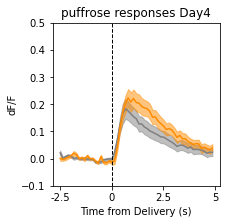

In [61]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("sucrose responses Day4")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

#ax.set_ylim(-.1, 0.15)
ax.set_ylim(-0.1,0.5)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
fig.savefig('Day4_suc_mean_dF_lax-cutoff.pdf', format='pdF', dpi=300)
fig.savefig('Day4_suc_mean_dF_lax-cutoff.png', format='png', dpi=300)

### Identifying indices of responsive cells

In [95]:
pos_sal_d0 = pdfc_sal[pdfc_sal.iloc[:,0].gt(0.05)].index
pos_sal_d2 = pdfc_sal[pdfc_sal.iloc[:,1].gt(0.05)].index
pos_sal_d4 = pdfc_sal[pdfc_sal.iloc[:,2].gt(0.05)].index
pos_sal_d6 = pdfc_sal[pdfc_sal.iloc[:,3].gt(0.05)].index
pos_sal_d14 = pdfc_sal[pdfc_sal.iloc[:,4].gt(0.05)].index

pos_mor_d0 = pdfc_mor[pdfc_mor.iloc[:,0].gt(0.05)].index
pos_mor_d2 = pdfc_mor[pdfc_mor.iloc[:,1].gt(0.05)].index
pos_mor_d4 = pdfc_mor[pdfc_mor.iloc[:,2].gt(0.05)].index
pos_mor_d6 = pdfc_mor[pdfc_mor.iloc[:,3].gt(0.05)].index
pos_mor_d14 = pdfc_mor[pdfc_mor.iloc[:,4].gt(0.05)].index

Plotting only the responsive cells

In [48]:
time = np.arange(0, 57)

In [99]:
sal = suc_dF['saline_Day6'].iloc[pos_sal_d6,0:57].mean(axis=0)
sal_sem = suc_dF['saline_Day6'].iloc[pos_sal_d6,0:57].sem(axis=0)
mor = suc_dF['morphine_Day6'].iloc[pos_mor_d6,0:57].mean(axis=0)
mor_sem = suc_dF['morphine_Day6'].iloc[pos_mor_d6,0:57].sem(axis=0)

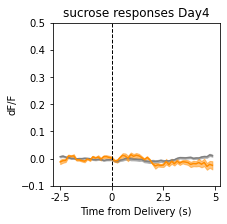

In [100]:
fig, ax = plt.subplots(ncols=1, figsize=(3,3))
plt.title("sucrose responses Day4")
sns.lineplot(x=time, y=sal, color='gray',label="saline")
plt.fill_between(time, sal-sal_sem,  sal + sal_sem, color='gray', alpha=0.5)
sns.lineplot(x=time, y=mor, label="morphine", color='darkorange')
plt.fill_between(time, mor-mor_sem,  mor + mor_sem, alpha=0.5, color='darkorange')

#ax.set_ylim(-.1, 0.15)
ax.set_ylim(-0.1,0.5)
ax.get_legend().remove()
ax.set_xticks([0,19,38,57])
ax.set_xticklabels(['-2.5','0','2.5','5'])
ax.axvline(19, lw='1', color='k', linestyle='--')
ax.set(xlabel='Time from Delivery (s)', ylabel='dF/F')
os.chdir(save_dir)
#fig.savefig('Day4_suc_mean_dF_lax-cutoff.pdf', format='pdF', dpi=300)
#fig.savefig('Day4_suc_mean_dF_lax-cutoff.png', format='png', dpi=300)

### Evaluating peak features of responsive cells

In [ ]:
Day0_df = pd.concat([suc_dF['saline_Day0'].iloc[pos_sal_d0,0:75], suc_dF['salphine_Day0'].iloc[pos_sal_d0,0:75]], axis=0)
Day2_df = pd.concat([suc_dF['saline_Day2'].iloc[pos_sal_d2,0:75], suc_dF['salphine_Day2'].iloc[pos_sal_d2,0:75]], axis=0)
Day4_df = pd.concat([suc_dF['saline_Day4'].iloc[pos_sal_d4,0:75], suc_dF['salphine_Day4'].iloc[pos_sal_d4,0:75]], axis=0)
Day6_df = pd.concat([suc_dF['saline_Day6'].iloc[pos_sal_d6,0:75], suc_dF['salphine_Day6'].iloc[pos_sal_d6,0:75]], axis=0)
Day14_df = pd.concat([suc_dF['saline_Day14'].iloc[pos_sal_d14,0:75], suc_dF['salphine_Day14'].iloc[pos_sal_d14,0:75]], axis=0)

In [ ]:
Day0_df_sal = suc_dF['saline_Day0'].iloc[pos_sal_d0,0:75]
Day2_df_sal = suc_dF['saline_Day2'].iloc[pos_sal_d2,0:75]
Day4_df_sal = suc_dF['saline_Day4'].iloc[pos_sal_d4,0:75]
Day6_df_sal = suc_dF['saline_Day6'].iloc[pos_sal_d6,0:75]
Day14_df_sal = suc_dF['saline_Day14'].iloc[pos_sal_d14,0:75]

In [ ]:
Day0_df_mor = suc_dF['morphine_Day0'].iloc[pos_mor_d0,0:75]
Day2_df_mor = suc_dF['morphine_Day2'].iloc[pos_mor_d2,0:75]
Day4_df_mor = suc_dF['morphine_Day4'].iloc[pos_mor_d4,0:75]
Day6_df_mor = suc_dF['morphine_Day6'].iloc[pos_mor_d6,0:75]
Day14_df_mor = suc_dF['morphine_Day14'].iloc[pos_mor_d14,0:75]

In [ ]:
big_dict_sal = {'Day0': Day0_df_sal,
            'Day2': Day2_df_sal,
            'Day4': Day4_df_sal,
            'Day6': Day6_df_sal,
            'Day14': Day14_df_sal
}

In [ ]:
big_dict_mor = {'Day0': Day0_df_mor,
            'Day2': Day2_df_mor,
            'Day4': Day4_df_mor,
            'Day6': Day6_df_mor,
            'Day14': Day14_df_mor
}

Calculating area under the curve

In [ ]:
import numpy as np
from scipy.integrate import simpson
from numpy import trapz

In [ ]:
auc_list = list()
auc_df = pd.DataFrame()

for key in big_dict_sal:
    for index, row in big_dict_sal[key].iterrows():
        t = row
        auc = trapz(row[20:77], dx=1)
        auc_list.append(auc)
    auc_df = pd.concat([auc_df, pd.DataFrame(auc_list)], axis=1)
    auc_list = list()
auc_df.columns = ['Day0','Day2','Day4','Day6','Day14']

In [ ]:
auc_df.to_excel(save_dir + '/responsive_cells/auc_suc_dF_responsive_sal.xlsx')